# MACHINE LEARNING : DATA ANALYSIS (BEFORE MODELLING)


### AIDI-1002


## Dataset description

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

## Attribute Information:

#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

-   school – student’s school (binary: ‘GP’ – Gabriel Pereira or ‘MS’ – Mousinho da Silveira)
-   sex – student’s sex (binary: ‘F’ – female or ‘M’ – male)
-   age – student’s age (numeric: from 15 to 22)
-   address – student’s home address type (binary: ‘U’ – urban or ‘R’ – rural)
-   famsize – family size (binary: ‘LE3’ – less or equal to 3 or ‘GT3’ – greater than 3)
-   Pstatus – parent’s cohabitation status (binary: ‘T’ – living together or ‘A’ – apart)
-   Medu – mother’s education (numeric: 0 – none, 1 – primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)
-   Fedu – father’s education (numeric: 0 – none, 1 – primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)
-   Mjob – mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
-   Fjob – father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
-   reason – reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)
-   guardian – student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)
-   traveltime – home to school travel time (numeric: 1 – <15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour, or 4 – >1 hour)
-   studytime – weekly study time (numeric: 1 – <2 hours, 2 – 2 to 5 hours, 3 – 5 to 10 hours, or 4 – >10 hours)
-   failures – number of past class failures (numeric: n if 1<=n<3, else 4)
-   schoolsup – extra educational support (binary: yes or no)
-   famsup – family educational support (binary: yes or no)
-   paid – extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
-   activities – extra-curricular activities (binary: yes or no)
-   nursery – attended nursery school (binary: yes or no)
-   higher – wants to take higher education (binary: yes or no)
-   internet – Internet access at home (binary: yes or no)
-   romantic – with a romantic relationship (binary: yes or no)
-   famrel – quality of family relationships (numeric: from 1 – very bad to 5 – excellent)
-   freetime – free time after school (numeric: from 1 – very low to 5 – very high)
-   goout – going out with friends (numeric: from 1 – very low to 5 – very high)
-   Dalc – workday alcohol consumption (numeric: from 1 – very low to 5 – very high)
-   Walc – weekend alcohol consumption (numeric: from 1 – very low to 5 – very high)
-   health – current health status (numeric: from 1 – very bad to 5 – very good)
-   absences – number of school absences (numeric: from 0 to 93)

The following grades are related with the course subject, Math or Portuguese:

-   G1 – first period grade (numeric: from 0 to 20)
-   G2 – second period grade (numeric: from 0 to 20)
-   G3 – final grade (numeric: from 0 to 20, output target)

### Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
por_df = pd.read_csv('student-por.csv',sep=';')
math_df = pd.read_csv('student-mat.csv',sep=';')
#math_df = math_df[(math_df['G3']>0) & (math_df['age']<=19) & (math_df['Fedu']>0) & (math_df['Medu']>0)]
display(math_df)
#por_df = por_df[(por_df['G3']>1) & (por_df['age']<=19) & (por_df['Fedu']>0) & (por_df['Medu']>0)]
display(por_df)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


**As we can see, there is no features with continuous type. Except G1/G2 score, others are all binary/five-level data**

## Exploratory data analysis

### Correlation analysis

Examine the correlation between ecah features and G3

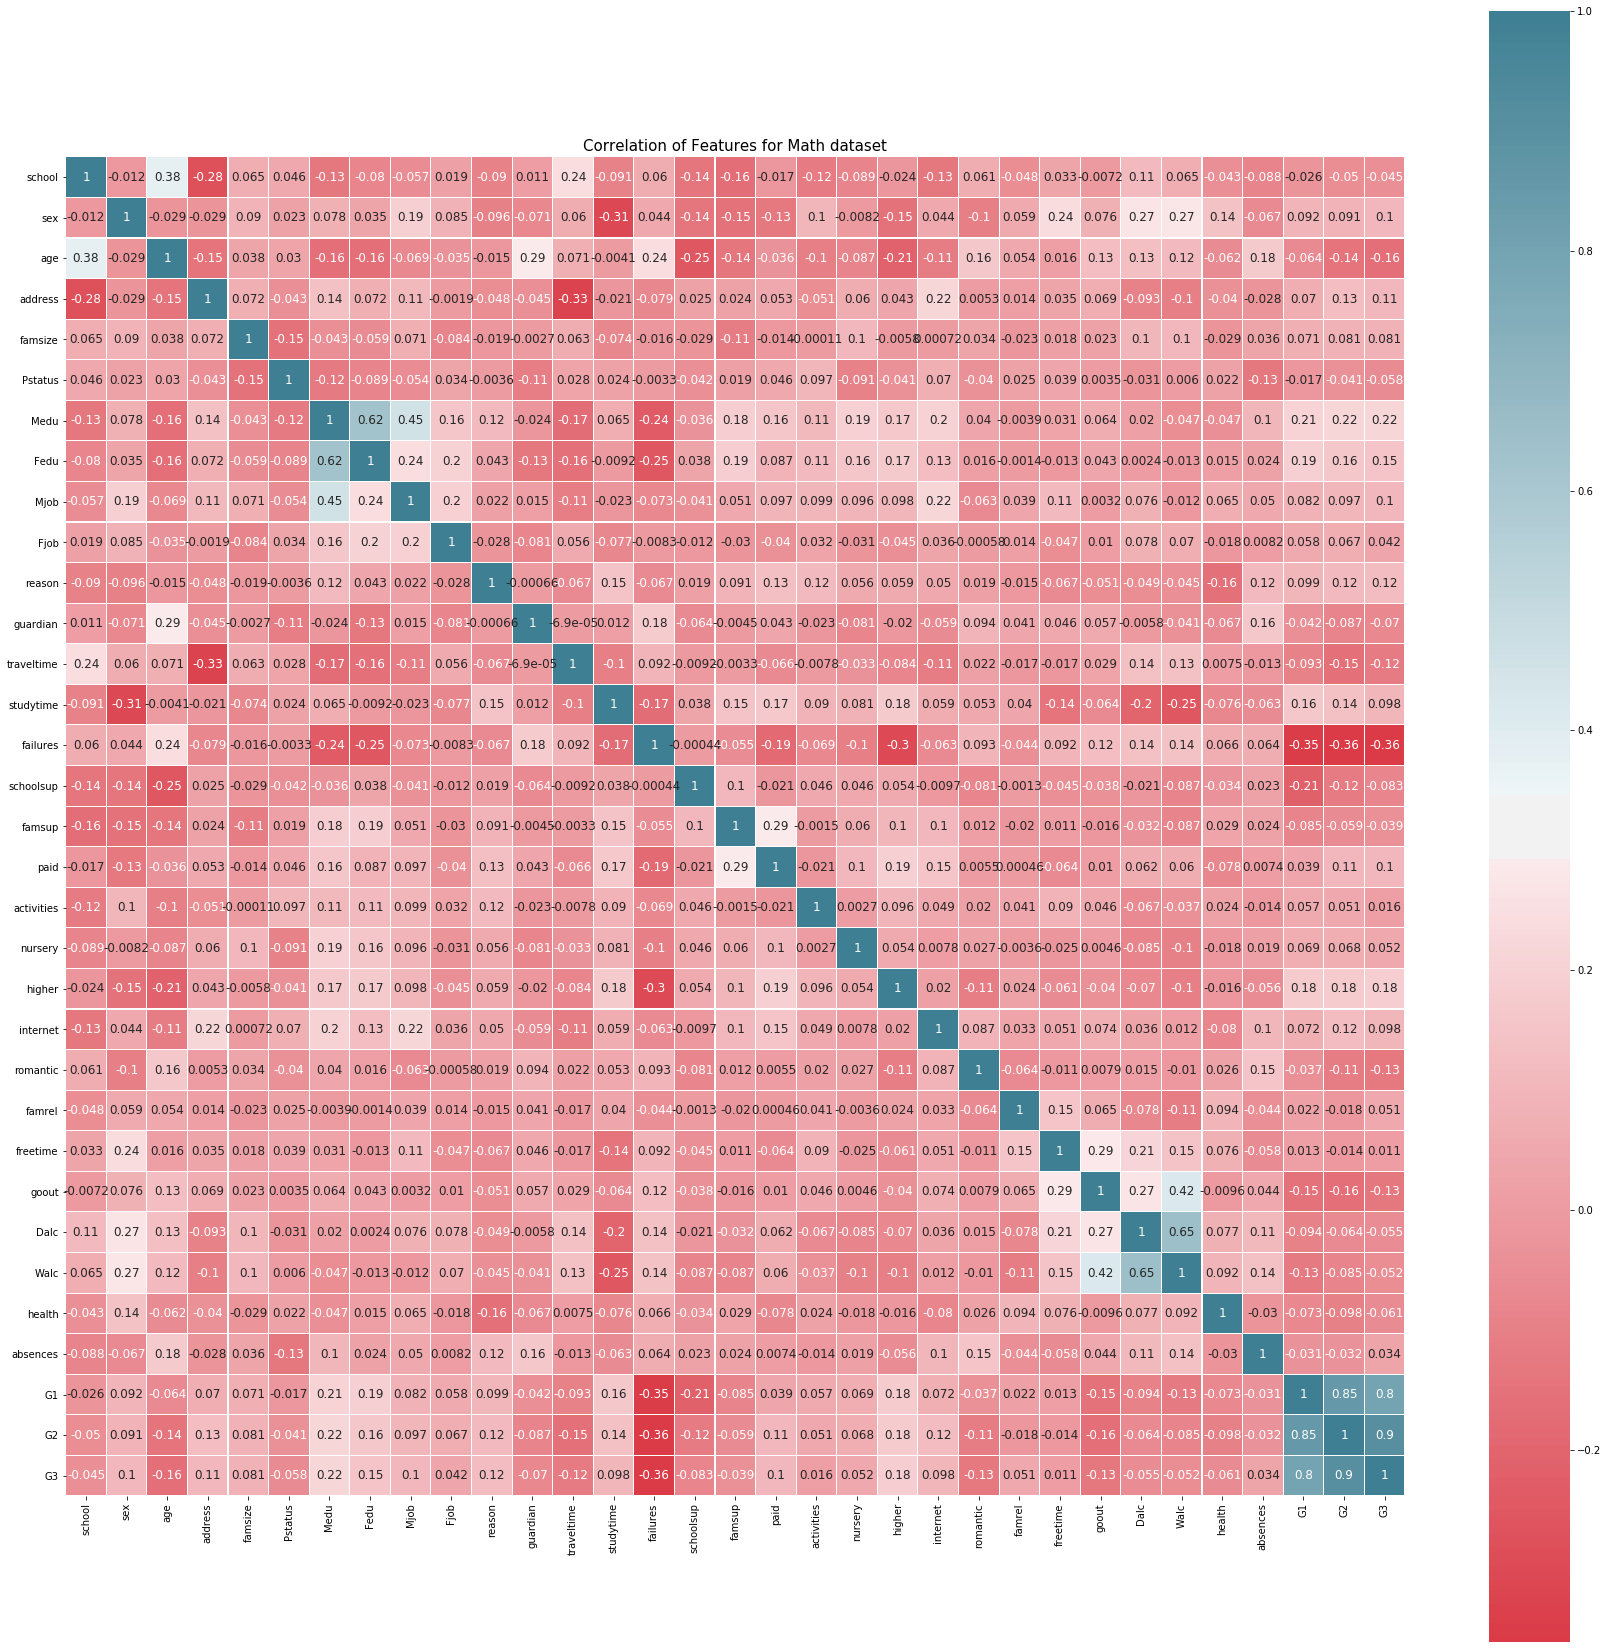

In [2]:
import numpy as np
import seaborn as sns

def encodeDataset(df):
    df2 = pd.DataFrame()
    for col in df.columns:
        if df[col].dtypes=='int64' or df[col].dtypes=='float':
            df2[col] = df[col]
        else:
            df2[col] = df[col].astype("category").cat.codes
    return df2

corr = encodeDataset(math_df).corr()
plt.figure(figsize=(30,30))
plt.title('Correlation of Features for Math dataset', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(corr,
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()


Some observation on it:
1.	Mother and Father’s education and jobs are related.
2.	Alcohol consumption and gout are related.
3.	G1, G2, G3 scores are related

### Correlation analysis for G3  in Portuguese language performance and other features
List the correlation value greater thean 15%

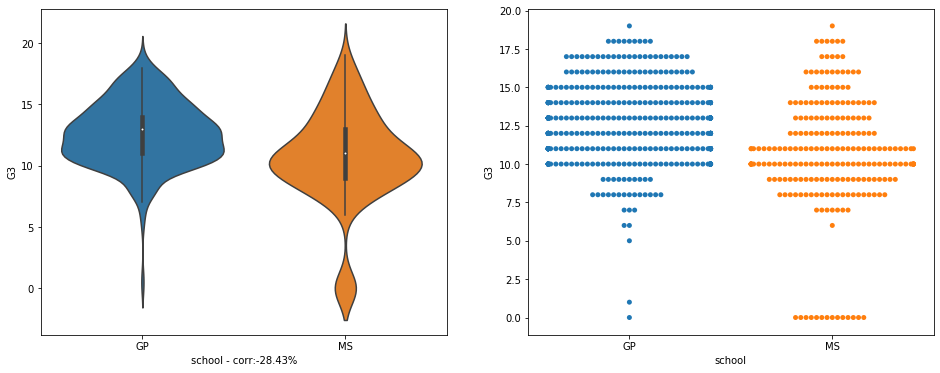

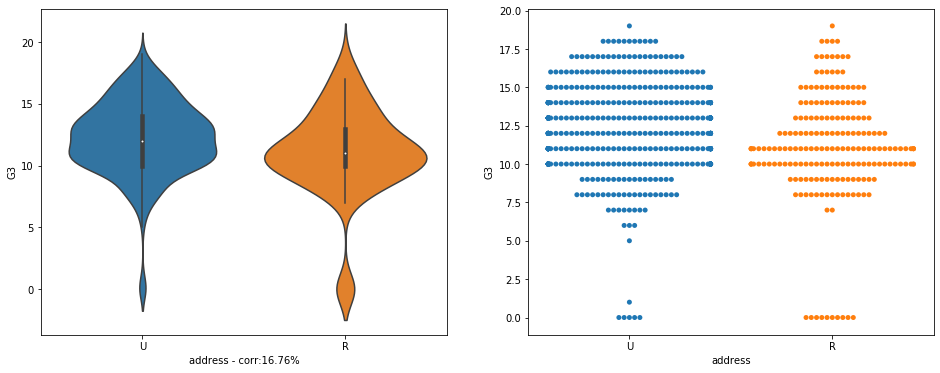

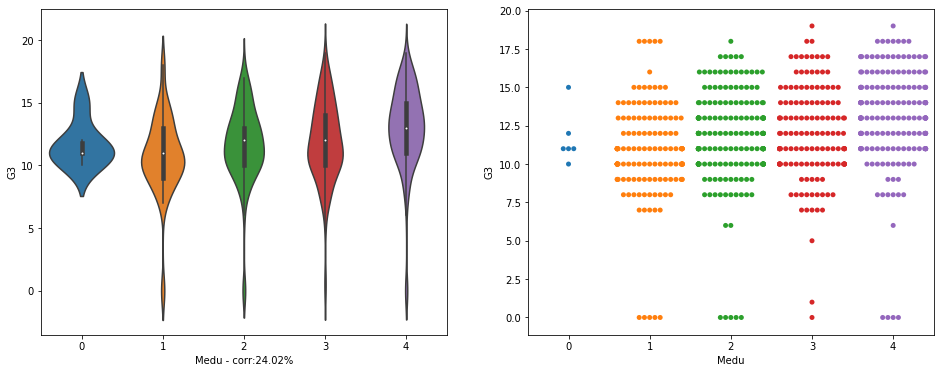

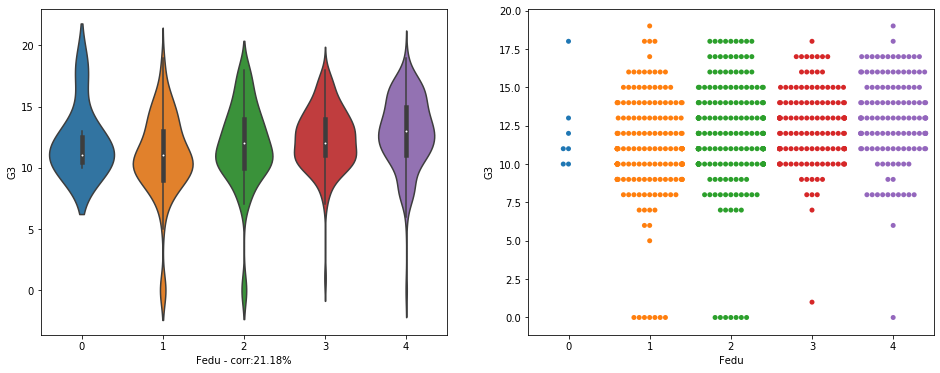

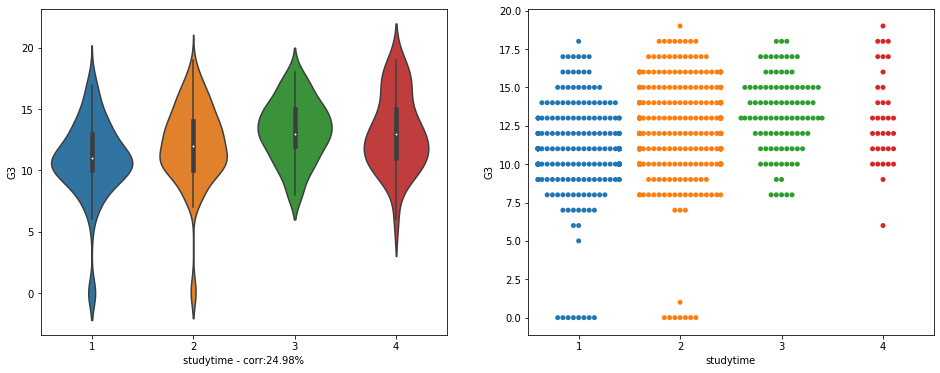

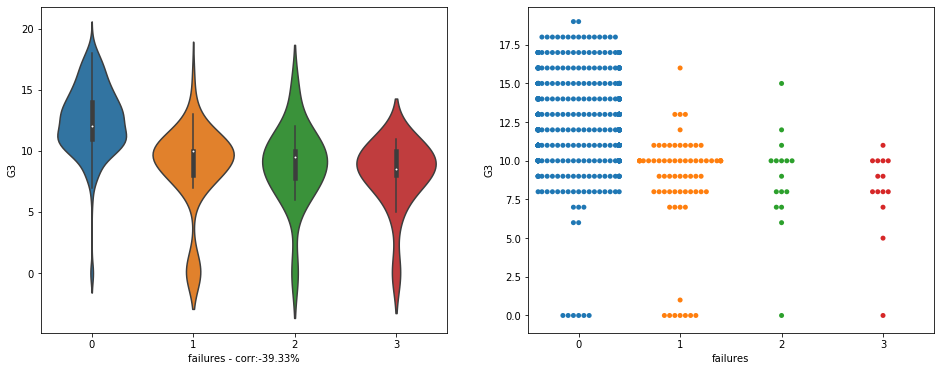

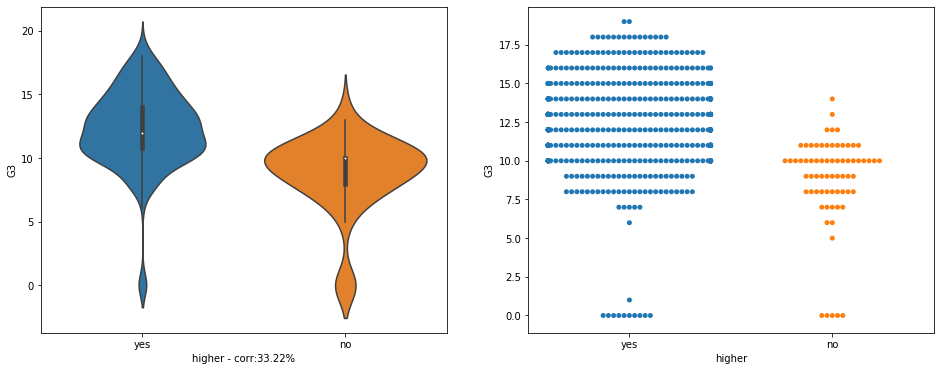

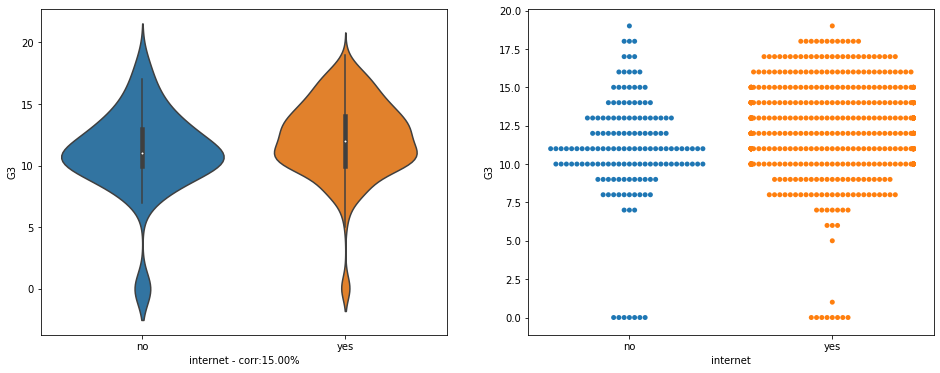

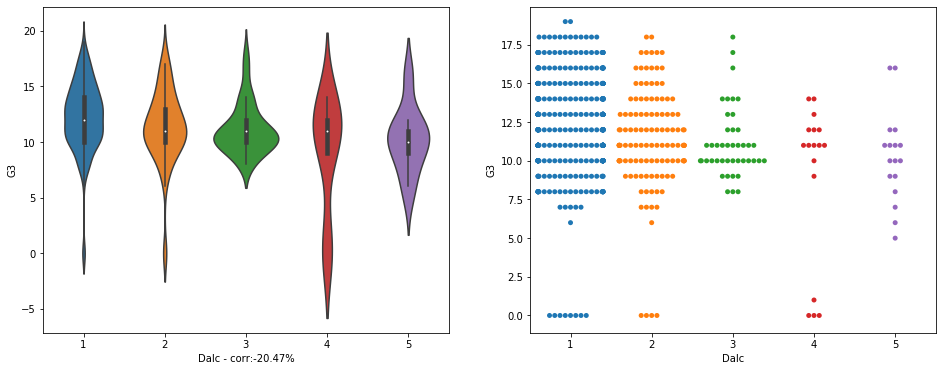

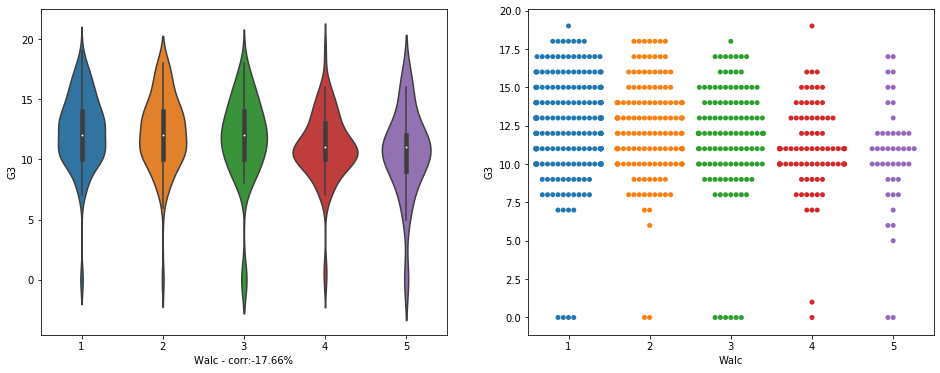

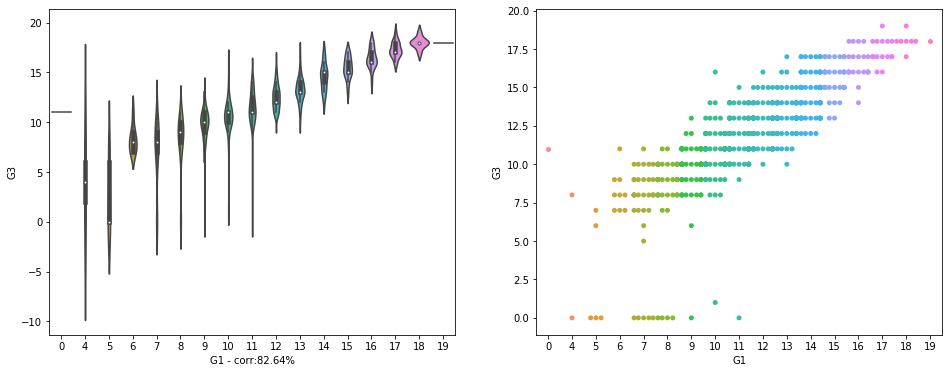

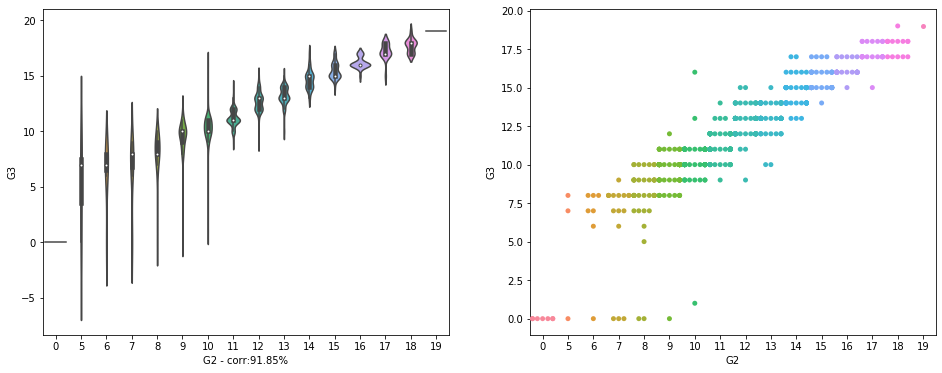

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.083050,0.087170,-0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,...,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294
address,-0.354520,0.025503,-0.025848,1.000000,0.046113,-0.094635,0.190320,0.141493,0.159761,-0.006535,...,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.157127,0.154600,0.167637
Medu,-0.254787,0.119127,-0.107832,0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,...,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.209806,0.083913,-0.121050,0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,...,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
studytime,-0.137857,-0.206214,-0.008415,0.062023,-0.010945,-0.008748,0.097006,0.050400,0.057176,-0.019125,...,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.113788,0.073888,0.319968,-0.063824,-0.066068,-0.009881,-0.172210,-0.165915,-0.117882,-0.055415,...,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
higher,-0.136112,-0.058134,-0.265497,0.076706,0.004523,0.022726,0.213896,0.191735,0.148116,0.089929,...,0.048239,-0.102618,-0.069105,-0.131663,-0.084327,0.017290,-0.129891,0.349030,0.331953,0.332172
internet,-0.240486,0.065911,0.013115,0.175794,0.013357,0.059754,0.266052,0.183483,0.260658,0.088625,...,0.082214,0.063268,0.092869,0.042811,0.060651,-0.022792,0.067301,0.139931,0.147909,0.150025
Dalc,0.047169,0.282696,0.134768,-0.047304,0.060482,0.041513,-0.007018,0.000061,0.049576,0.055389,...,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719
Walc,0.014169,0.320785,0.086357,-0.012416,0.081958,0.070976,-0.019766,0.038445,0.025657,0.044607,...,-0.093511,0.120244,0.388680,0.616561,1.000000,0.114988,0.156373,-0.155649,-0.164852,-0.176619


In [3]:
def corr_analyze(df, target='G3', corr_threshold = 0.15):
    corr_df =  encodeDataset(df).corr()
    corr_df = corr_df[ corr_df[target].abs()>=corr_threshold ].drop(target)
    for col in corr_df.index:
        f, axes = plt.subplots(1, 2, figsize=(16,6))
        sns.violinplot(x=col, y=target, data = df , ax=axes[0])
        axes[0].set_xlabel(f'{col} - corr:{corr_df.loc[col,target]:.2%}')
        sns.swarmplot(x=col, y=target, data = df ,  ax=axes[1])
        plt.show()
    return corr_df
corr_analyze(por_df)

** Below is some observations base on the Correlation analysis results**
1. G3 has strong correlation with G1 or G2
2. G3 has weak correlation with failures, Medu, higher
3. G3 has no obvious correlation with sex, school or other single feature 

#### Weekend alcohol consumption and goout

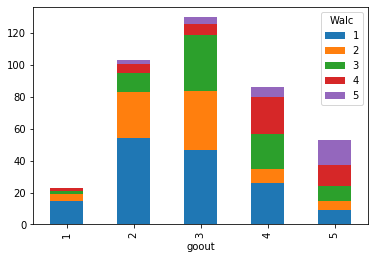

In [4]:
df_plot = math_df.groupby(['Walc', 'goout']).size().reset_index().pivot(columns='Walc', index='goout', values=0)
df_plot.plot(kind='bar', stacked=True)

- Students who go out more will consume more alcohol.
- Most students will go out sometimes at weekend and consume alcohols

Parents' jobs and education

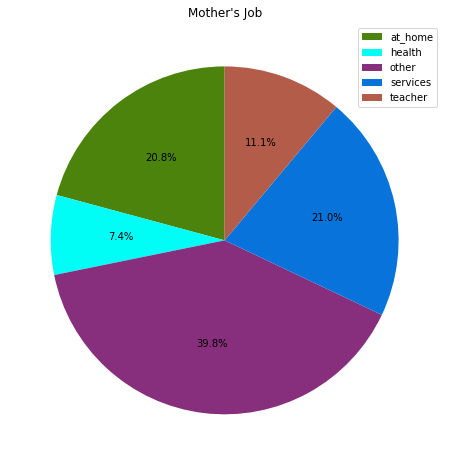

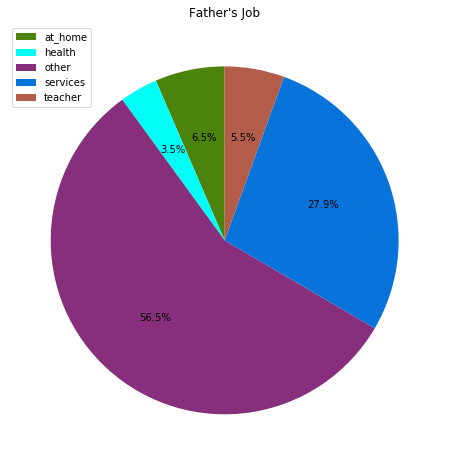

In [17]:
import binascii
def draw_piechart(serial, title, pallets=[list(np.random.random(size=3)) for i in range(100)]):
    data=serial.groupby(serial).count()
    colors = [pallets[binascii.crc32(x.encode('utf8')) % 100] for x in data.index]
    plt.figure(figsize=(8,8))
    plt.pie(data,colors=colors,autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.legend(data.index)
    plt.show()

draw_piechart(por_df['Mjob'],"Mother's Job")
draw_piechart(por_df['Fjob'],"Father's Job")


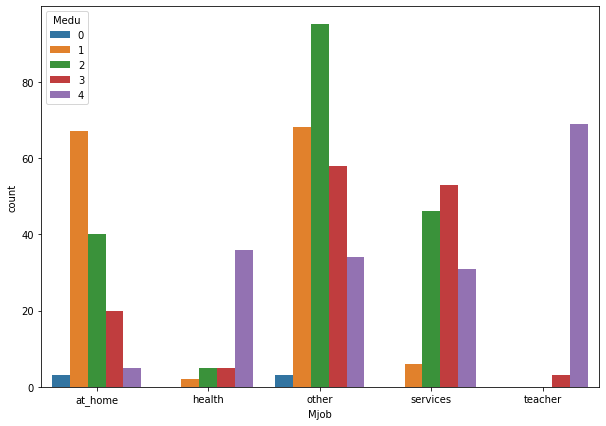

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x="Mjob", hue ="Medu", data=por_df.sort_values('Mjob'))

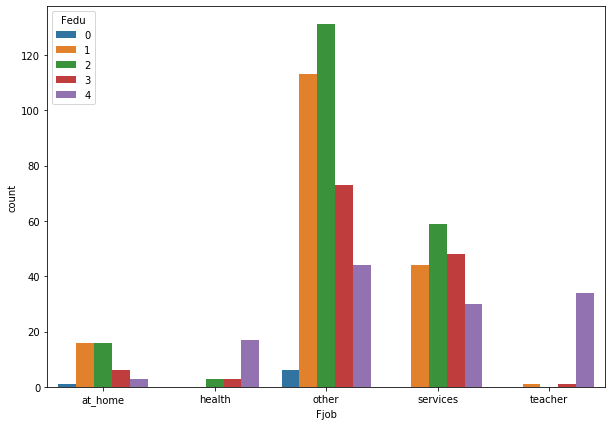

In [7]:
plt.figure(figsize=(10,7))
sns.countplot(x="Fjob", hue ="Fedu", data=por_df.sort_values('Fjob'))

- Teacher jobs normally need highest education
- Mothers are more likely to be teacher or at home

## Algorithms and modules

List algorithms

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LinearRegression  
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline 
def decisionTree():
    dt = DecisionTreeClassifier()
    return dt
def knn():
    knn = KNeighborsRegressor(n_neighbors=1)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=0, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=0)
    return clf

def LR():
    clf = LogisticRegression(solver='lbfgs', max_iter=10000)
    return clf

def NB():
    clf = GaussianNB()
    return clf

class MyAVERAGE:
    def fit(self,train_X,train_Y):
        self.mean_score = train_Y.mean()
        return self
    def predict(self, test_x):
        test_x['predict'] = self.mean_score
        return test_x['predict']

class LRPolynomialFeatures:
    def __init__(self, degree):
        self.poly = PolynomialFeatures(degree = degree)
        self.lr = LinearRegression()
    def fit(self,train_X,train_Y):
        x_poly = self.poly.fit_transform(train_X)
        self.lr.fit(x_poly, train_Y)
        self.coef_ = self.lr.coef_
        return self
    def predict(self, train_X):
        x_poly = self.poly.fit_transform(train_X)
        return self.lr.predict(x_poly)
    

def allmodels():
    return {
        #'LR PolynomialFeatures' : LRPolynomialFeatures(3),
        #'LRP': make_pipeline(PolynomialFeatures(4), LinearRegression()),
        #'Logistic Regression': LR(),
        'Linear Regression': LinearRegression(),
        #'Naive Bayes': GaussianNB(),
        #'KNN':knn(),
        #'Decision Tree': decisionTree(),
        'Random Forest': randomForestRegressor(),
        #'Extra Tree': extraTreesRegressor(),
        #'AVG grade': MyAVERAGE(),
    }

### Set up KFold Cross Validation
Use mean absolute error for result score 

In [9]:
def norm(df):
    for col in df.columns:
        mean1 = np.mean(df[col])
        std1 = np.std(df[col])
        df[col] = (df[col].values - mean1)/std1
    return df

def important_features(model, X_df):
    importances = 'No importances features'
    if hasattr(model, 'coef_'):
        if len(model.coef_)==len(X_df.columns):
            importances = pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":np.abs([x for x in model.coef_])})
        else:
            importances = pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":np.abs(model.coef_[0])})
        importances = importances.sort_values('Coefficients',ascending=False).reset_index(drop=True)
    if hasattr(model, 'feature_importances_'):
        importances =  pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":model.feature_importances_})
        importances= importances.sort_values('Coefficients',ascending=False).reset_index(drop=True)
    return importances

def CrossValidation(df, models=allmodels(), doNorm = False, predictCol = 'G3', showImportance = False):
    Y_df = df[predictCol]
    X_df = df.drop([predictCol], axis = 1) 
    if doNorm==True:
        X_df = norm(X_df)
    kf = KFold(n_splits=5)
    model_result = pd.DataFrame(columns =  ['Algorithm','fold 1','fold 2','fold 3','fold 4','fold 5','fold mean'])
    for key,v in models.items():
        result = [key]
        estimator = v
        for train_index, test_index in kf.split(df):
            estimator.fit(X_df.loc[train_index],Y_df.loc[train_index])
            predict_Y = estimator.predict(X_df.loc[test_index])
            #score = estimator.score(X_df.loc[test_index], Y_df.loc[test_index])
            score = mean_absolute_error(Y_df.loc[test_index],predict_Y)
            result.append(score)
        if showImportance == True:
            importances = important_features(estimator, X_df)
            display(f'{key} , fold {len(result)}, {type(importances)}:')
            if type(importances) != str:
                display(importances[0:10].transpose())
        result.append(np.mean(result[1:6]))
        model_result.loc[len(model_result), :] = result
    model_result= model_result.sort_values('fold mean',ascending=True ).reset_index(drop=True)
    #display( model_result)
    return model_result


Training with all features. So if we can know G2 score for each student, we can predict the G3 results with high accuracy

In [136]:
df = math_df.copy()
df = pd.get_dummies(df)
#display(df)
print('All features')
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)
print('Only G2')
model_result = CrossValidation(df.loc[:,['G2','G3']], doNorm = False, showImportance=False)
display(model_result)


All features


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Linear Regression,1.20875,1.27745,1.54084,1.25385,1.538,1.36378
1,Random Forest,1.62203,2.43127,1.62177,1.8557,2.0862,1.92339


Only G2


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Linear Regression,0.826689,1.17269,1.19465,1.16307,1.37494,1.14641
1,Random Forest,0.923275,0.988405,1.26487,1.12147,1.50748,1.1611


### Predict without G1 ang G2
#### Predict G3 for Math 

In [137]:
df = math_df.copy().drop(['G1', 'G2'],axis=1)
df = pd.get_dummies(df)
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=True)
display(model_result)

"Linear Regression , fold 6, <class 'pandas.core.frame.DataFrame'>:"

,0,1,2,3,4,5,6,7,8,9
Feature,failures,Fjob_teacher,higher_no,higher_yes,Mjob_teacher,goout,Fjob_other,Mjob_services,Mjob_health,Fjob_services
Coefficients,1.64833,1.1911,1.14827,1.14827,1.03738,0.940476,0.931434,0.927695,0.893182,0.805391


"Random Forest , fold 6, <class 'pandas.core.frame.DataFrame'>:"

,0,1,2,3,4,5,6,7,8,9
Feature,absences,failures,goout,Medu,age,famrel,freetime,health,studytime,Walc
Coefficients,0.0751945,0.0667061,0.0543095,0.0415953,0.0386886,0.0343824,0.0342383,0.0327327,0.0309263,0.0300391


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Random Forest,2.71848,3.76949,2.98013,3.36633,3.48709,3.2643
1,Linear Regression,2.85662,4.00268,3.12218,3.53928,3.80968,3.46609


#### Predict G3 for Portuguese

In [138]:
df = por_df.copy().drop(['G1', 'G2'],axis=1)
df = pd.get_dummies(df)
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=True)
display(model_result)

"Linear Regression , fold 6, <class 'pandas.core.frame.DataFrame'>:"

,0,1,2,3,4,5,6,7,8,9
Feature,address_U,address_R,guardian_other,guardian_mother,guardian_father,nursery_no,nursery_yes,Mjob_health,Mjob_teacher,Mjob_services
Coefficients,3.75339e+12,3.75339e+12,2.25042e+12,2.25042e+12,2.25042e+12,1.82264e+12,1.82264e+12,1.33581e+12,1.33581e+12,1.33581e+12


"Random Forest , fold 6, <class 'pandas.core.frame.DataFrame'>:"

,0,1,2,3,4,5,6,7,8,9
Feature,failures,absences,Walc,goout,Medu,age,higher_no,health,Fedu,studytime
Coefficients,0.0693578,0.0446566,0.0415273,0.0403325,0.0401874,0.0360059,0.0340052,0.033529,0.0332551,0.0326755


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Random Forest,1.51877,1.81569,1.93823,2.03085,2.7969,2.02009
1,Linear Regression,1.59197,1.88271,1.8074,2.08156,2.92893,2.05851


#### Get the top 10 important features from Random Forest algorithm for math and train the model. The result can be improved

In [139]:
cols = ['failures','absences','goout','freetime','Medu','famrel','age','studytime','health','Walc']
cols = ['failures','absences', 'Walc','failures', 'health', 'goout', 'freetime', 'traveltime','higher']
#cols = ['failures','higher','Fjob','Mjob','Medu','famrel','goout','studytime','health','Walc']
cols.append('G3')
df = pd.get_dummies(math_df.loc[:,cols])
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Random Forest,2.70215,3.77468,2.86523,3.15217,3.44975,3.1888
1,Linear Regression,2.71305,3.92743,3.06183,3.12132,3.7247,3.30966


### Use Greedy Algorithm to select most affective features

In [140]:
def doOneValidation(df_all, k, m, cols_test, cols, best_score):
    #print(f'{k}: doOneValidation cols:{cols_test}, score:{best_score}')
    best_cols = cols_test.copy()
    new_best_score = best_score
    for col in cols:
        if col in cols_test:
            continue
        cols_test_new = cols_test.copy()
        cols_test_new.append(col)
        #print(f'cols_test_new:{cols_test_new}, cols_test:{cols_test}')
        df = df_all.loc[:,cols_test_new]
        df = pd.get_dummies(df)
        ret =  CrossValidation(df, doNorm = False, showImportance=False, models = {k:m})
        newscore = ret.loc[0,'fold mean']
        #print(f'{k}: CrossValidation result cols:{cols_test_new}, score:{newscore}')
        if newscore<best_score:
            best_cols = cols_test_new.copy()
            new_best_score = newscore
    if new_best_score<best_score:
        return doOneValidation(df_all, k, m, best_cols, cols, new_best_score)
    return new_best_score, best_cols

def greedyValidation(df_all, models = allmodels()):
    cols = df_all.drop(['G1','G2','G3'],axis=1).columns.tolist()
    for k,m in models.items():
        best_score = np.iinfo(np.int32).max
        cols_test = ['G3']
        score, best_cols = doOneValidation(df_all, k, m, cols_test, cols, best_score)
        print(f'{k} best score: {score}, important features:{best_cols}')

Apply greedy algorithm with Linear Regression for Math

In [141]:
greedyValidation(math_df, models = {'LR':LinearRegression()})

LR best score: 3.238921244811929, important features:['G3', 'absences', 'Walc', 'higher', 'internet', 'schoolsup', 'failures', 'health', 'goout', 'freetime', 'traveltime', 'Mjob', 'famrel', 'address']


Apply greedy algorithm with Linear Regression for Math

In [142]:
greedyValidation(por_df, models = {'LR':LinearRegression()})

LR best score: 2.0089262580546245, important features:['G3', 'absences', 'health', 'Walc', 'Dalc', 'goout', 'romantic', 'internet', 'higher', 'activities', 'paid', 'failures', 'studytime', 'famrel', 'schoolsup', 'traveltime', 'reason', 'Fjob', 'Mjob', 'Medu', 'age', 'sex', 'school', 'famsize']


Select features from result of greedy algorithm. Only select features related to students behaviour, but not related to his family or status such as sex or age. 

In [143]:
cols = ['absences', 'Walc','failures', 'health', 'goout', 'freetime', 'traveltime']
cols.append('G3')
df = pd.get_dummies(math_df.loc[:,cols])
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Random Forest,2.75372,3.69511,2.91531,3.21425,3.4517,3.20602
1,Linear Regression,2.70487,3.96052,3.00283,3.12208,3.66673,3.29141


The result for math is good. But for por, two more featues related to student's family may need to be added for good result

In [144]:
cols = ['absences', 'Walc','failures', 'health', 'goout', 'freetime', 'traveltime', 'Mjob', 'famrel']
cols.append('G3')
df = pd.get_dummies(por_df.loc[:,cols])
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Linear Regression,1.57484,1.87711,2.13561,2.11137,3.00933,2.14165
1,Random Forest,1.72578,1.8358,2.28135,2.25561,3.02318,2.22434


A chart to illustrate the linear regression for those 9 features

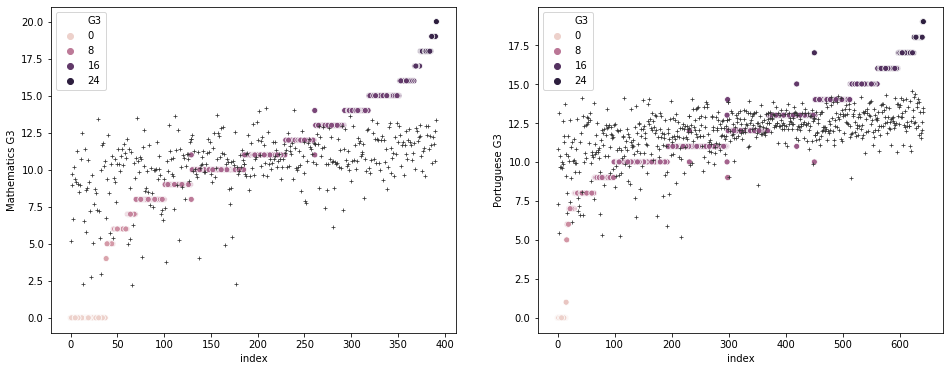

In [145]:
plotcols = ['G3', 'absences', 'Walc','failures', 'health', 'goout', 'freetime', 'traveltime', 'Mjob', 'famrel']

def plot_reg(df,cols,ax):
    target = cols[0]
    #model = LinearRegression()
    model = make_pipeline(PolynomialFeatures(1), LinearRegression())
    X = pd.get_dummies(df.loc[:,cols[1:]])
    Y = df[target]
    model.fit(X,Y)
    df2 = df.loc[:,cols].groupby(cols[1:])[target].mean().sort_values().reset_index().reset_index().drop(target,axis=1)
    df3 = pd.merge(df,df2,on=cols[1:])
    sns.scatterplot(x='index', y=target, data = df3, hue=target, ax=ax)
    PX= pd.get_dummies(df3.loc[:,cols[1:]])
    predict_Y =  model.predict(PX)
    df3['predict'] = predict_Y
    sns.scatterplot(x='index', y='predict', data = df3,  ax=ax, s=10, color=".2", marker="+")

def plot_compare(cols):
    f, axes = plt.subplots(1, 2, figsize=(16,6))
    plot_reg(math_df,cols,axes[0])
    axes[0].set_ylabel('Mathematics G3')
    #axes[0].set_xlabel(f' Features \n{cols}')
    plot_reg(por_df,cols,axes[1])
    axes[1].set_ylabel('Portuguese G3')
    #axes[1].set_xlabel(f'Portuguese Features {cols}')
    
plot_compare(plotcols)

### Conclusion
#### 1. With 7 students behaviour related features, we can have a good prediction for students' Math G3 result. 
#### 2. With 7 students behaviour related features and 2 more family related feature,  we can have a good prediction for students' Por G3 result.
#### 3. Prediction for Por is more accurate than prediction for Math. 
- For Math, prediction error is average 3 points.
- For Por, prediction error is average 2 points.

#####  4. If we can predict G3 based on G2 result, the prediction can be more accurate
- The prediction error can be average 1 point.